In [1]:
from players.tree_search_player import TreeSearchPlayer
from state_generator import transform_state
from tree_search import SearchTree, min_max_tree_search 
import time
import matplotlib.pyplot as plt

In [2]:
def sample_state_nodes(state, depth, alpha, accumulated_reward, timeout_start, timeout):
    if depth == 0 or state.terminal:
        return state.get_sample_value() + accumulated_reward
    max_action, min_state = state.sample_max_action(timeout_start, timeout)
    min_state_value = sample_state_nodes(
        min_state, depth - 1, alpha, accumulated_reward + state.reward, timeout_start, timeout)
    return min_state_value * alpha


In [3]:
depth = 5
alpha = 0.8
timeout = 20


In [14]:
state1 = {'game': {'id': '4bdfad2f-26ed-4f0a-8935-20c5eff3ac70', 'ruleset': {'name': 'wrapped', 'version': 'v1.2.0', 'settings': {'foodSpawnChance': 15, 'minimumFood': 1, 'hazardDamagePerTurn': 100, 'hazardMap': '', 'hazardMapAuthor': '', 'royale': {'shrinkEveryNTurns': 0}, 'squad': {'allowBodyCollisions': False, 'sharedElimination': False, 'sharedHealth': False, 'sharedLength': False}}}, 'map': 'hz_islands_bridges', 'timeout': 500, 'source': 'custom'}, 'turn': 186, 'board': {'height': 11, 'width': 11, 'snakes': [{'id': 'gs_3p6Sbq8v6hcpb8R6HfxkD9VM', 'name': 'Baseline', 'latency': '49', 'health': 95, 'body': [{'x': 7, 'y': 6}, {'x': 7, 'y': 7}, {'x': 8, 'y': 7}, {'x': 8, 'y': 8}, {'x': 9, 'y': 8}, {'x': 10, 'y': 8}, {'x': 10, 'y': 7}, {'x': 9, 'y': 7}, {'x': 9, 'y': 6}, {'x': 8, 'y': 6}, {'x': 8, 'y': 5}, {'x': 8, 'y': 4}, {'x': 7, 'y': 4}], 'head': {'x': 7, 'y': 6}, 'length': 13, 'shout': '', 'squad': '', 'customizations': {'color': '#3352ff', 'head': 'default', 'tail': 'default'}}, {'id': 'gs_myWvQPf9hSydCC4jyY9cY6fX', 'name': 'Bayesian Koala', 'latency': '358', 'health': 98, 'body': [{'x': 4, 'y': 7}, {'x': 3, 'y': 7}, {'x': 2, 'y': 7}, {'x': 2, 'y': 8}, {'x': 1, 'y': 8}, {'x': 1, 'y': 9}, {'x': 2, 'y': 9}, {'x': 2, 'y': 10}, {'x': 2, 'y': 0}, {'x': 3, 'y': 0}, {'x': 3, 'y': 1}, {'x': 4, 'y': 1}, {'x': 4, 'y': 2}, {'x': 3, 'y': 2}, {'x': 2, 'y': 2}, {'x': 2, 'y': 1}, {'x': 1, 'y': 1}], 'head': {'x': 4, 'y': 7}, 'length': 17, 'shout': '', 'squad': '', 'customizations': {'color': '#3352ff', 'head': 'default', 'tail': 'default'}}], 'food': [{'x': 7, 'y': 1}, {'x': 4, 'y': 6}, {'x': 6, 'y': 6}, {'x': 4, 'y': 4}], 'hazards': [{'x': 5, 'y': 10}, {'x': 5, 'y': 9}, {'x': 5, 'y': 7}, {'x': 5, 'y': 6}, {'x': 5, 'y': 5}, {'x': 5, 'y': 4}, {'x': 5, 'y': 3}, {'x': 5, 'y': 0}, {'x': 5, 'y': 1}, {'x': 6, 'y': 5}, {'x': 7, 'y': 5}, {'x': 9, 'y': 5}, {'x': 10, 'y': 5}, {'x': 4, 'y': 5}, {'x': 3, 'y': 5}, {'x': 1, 'y': 5}, {'x': 0, 'y': 5}, {'x': 1, 'y': 10}, {'x': 9, 'y': 10}, {'x': 1, 'y': 0}, {'x': 9, 'y': 0}, {'x': 10, 'y': 1}, {'x': 10, 'y': 0}, {'x': 10, 'y': 10}, {'x': 10, 'y': 9}, {'x': 0, 'y': 10}, {'x': 0, 'y': 9}, {'x': 0, 'y': 1}, {'x': 0, 'y': 0}, {'x': 0, 'y': 6}, {'x': 0, 'y': 4}, {'x': 10, 'y': 6}, {'x': 10, 'y': 4}, {'x': 6, 'y': 10}, {'x': 4, 'y': 10}, {'x': 6, 'y': 0}, {'x': 4, 'y': 0}]}, 'you': {'id': 'gs_3p6Sbq8v6hcpb8R6HfxkD9VM', 'name': 'Baseline', 'latency': '49', 'health': 95, 'body': [{'x': 7, 'y': 6}, {'x': 7, 'y': 7}, {'x': 8, 'y': 7}, {'x': 8, 'y': 8}, {'x': 9, 'y': 8}, {'x': 10, 'y': 8}, {'x': 10, 'y': 7}, {'x': 9, 'y': 7}, {'x': 9, 'y': 6}, {'x': 8, 'y': 6}, {'x': 8, 'y': 5}, {'x': 8, 'y': 4}, {'x': 7, 'y': 4}], 'head': {'x': 7, 'y': 6}, 'length': 13, 'shout': '', 'squad': '', 'customizations': {'color': '#3352ff', 'head': 'default', 'tail': 'default'}}}
state1['you'] = state1['board']['snakes'][1]

In [5]:
#state with winning strategy
def plot_before_tree_search(game_state):
    timeout_start = time.time()
    player = TreeSearchPlayer()
    state = transform_state(game_state)
    player.search_tree.set_root_state(state, timeout_start, timeout)
    # get the distribution of the next state
    max_action, state = player.search_tree.root_state.sample_max_action(
                timeout_start, timeout)

    data_points = []
    for i in range(10000):
        data_points.append(sample_state_nodes(state, depth, alpha, 0, timeout_start, timeout))


    plt.hist(data_points)
    return data_points


In [15]:
def plot_after_tree_search(game_state):
    # distribution after the tree search
    timeout_start = time.time()
    player = TreeSearchPlayer()
    print(player.move(game_state))
    max_action, state = player.search_tree.root_state.sample_max_action(
            timeout_start, timeout)

    data_points = []
    for i in range(10000):
        data_points.append(sample_state_nodes(state, depth, alpha, 0, timeout_start, timeout))

    #plot data
    plt.hist(data_points)
    return data_points

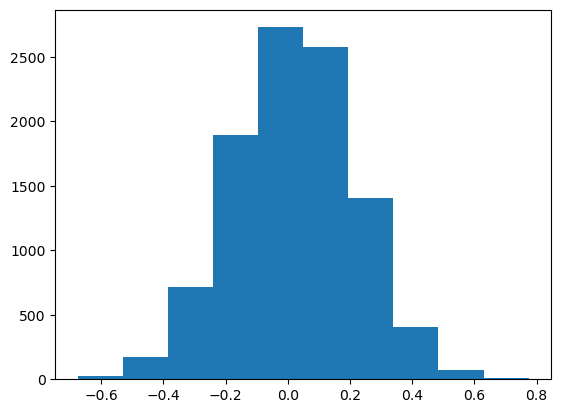

In [16]:
#winning state
data = plot_before_tree_search(state1)

11
{'move': 'up'}


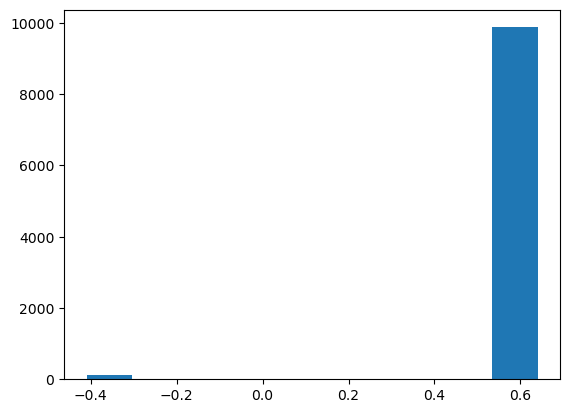

In [17]:
data = plot_after_tree_search(state1)

In [19]:
state2 = {'game': {'id': '71b4225b-edee-43e3-8b90-d75d4313a7d6', 'ruleset': {'name': 'wrapped', 'version': 'v1.2.0', 'settings': {'foodSpawnChance': 15, 'minimumFood': 1, 'hazardDamagePerTurn': 100, 'hazardMap': '', 'hazardMapAuthor': '', 'royale': {'shrinkEveryNTurns': 0}, 'squad': {'allowBodyCollisions': False, 'sharedElimination': False, 'sharedHealth': False, 'sharedLength': False}}}, 'map': 'hz_islands_bridges', 'timeout': 500, 'source': 'custom'}, 'turn': 41, 'board': {'height': 11, 'width': 11, 'snakes': [{'id': 'gs_DWY3v9gVMPgQ8S6bGp6QtJfW', 'name': 'Bayesian Koala', 'latency': '378', 'health': 88, 'body': [{'x': 10, 'y': 8}, {'x': 10, 'y': 7}, {'x': 9, 'y': 7}, {'x': 9, 'y': 6}, {'x': 8, 'y': 6}, {'x': 8, 'y': 7}, {'x': 8, 'y': 8}], 'head': {'x': 10, 'y': 8}, 'length': 7, 'shout': '', 'squad': '', 'customizations': {'color': '#3352ff', 'head': 'default', 'tail': 'default'}}, {'id': 'gs_wxQwqMH99hKTxpkRxm6RM4j4', 'name': 'Baseline', 'latency': '40', 'health': 93, 'body': [{'x': 2, 'y': 1}, {'x': 2, 'y': 2}, {'x': 1, 'y': 2}, {'x': 0, 'y': 2}, {'x': 10, 'y': 2}, {'x': 10, 'y': 3}], 'head': {'x': 2, 'y': 1}, 'length': 6, 'shout': '', 'squad': '', 'customizations': {'color': '#3352ff', 'head': 'default', 'tail': 'default'}}], 'food': [{'x': 1, 'y': 1}, {'x': 2, 'y': 9}, {'x': 7, 'y': 1}], 'hazards': [{'x': 5, 'y': 10}, {'x': 5, 'y': 9}, {'x': 5, 'y': 7}, {'x': 5, 'y': 6}, {'x': 5, 'y': 5}, {'x': 5, 'y': 4}, {'x': 5, 'y': 3}, {'x': 5, 'y': 0}, {'x': 5, 'y': 1}, {'x': 6, 'y': 5}, {'x': 7, 'y': 5}, {'x': 9, 'y': 5}, {'x': 10, 'y': 5}, {'x': 4, 'y': 5}, {'x': 3, 'y': 5}, {'x': 1, 'y': 5}, {'x': 0, 'y': 5}, {'x': 1, 'y': 10}, {'x': 9, 'y': 10}, {'x': 1, 'y': 0}, {'x': 9, 'y': 0}, {'x': 10, 'y': 1}, {'x': 10, 'y': 0}, {'x': 10, 'y': 10}, {'x': 10, 'y': 9}, {'x': 0, 'y': 10}, {'x': 0, 'y': 9}, {'x': 0, 'y': 1}, {'x': 0, 'y': 0}, {'x': 0, 'y': 6}, {'x': 0, 'y': 4}, {'x': 10, 'y': 6}, {'x': 10, 'y': 4}, {'x': 6, 'y': 10}, {'x': 4, 'y': 10}, {'x': 6, 'y': 0}, {'x': 4, 'y': 0}]}, 'you': {'id': 'gs_wxQwqMH99hKTxpkRxm6RM4j4', 'name': 'Baseline', 'latency': '40', 'health': 93, 'body': [{'x': 2, 'y': 1}, {'x': 2, 'y': 2}, {'x': 1, 'y': 2}, {'x': 0, 'y': 2}, {'x': 10, 'y': 2}, {'x': 10, 'y': 3}], 'head': {'x': 2, 'y': 1}, 'length': 6, 'shout': '', 'squad': '', 'customizations': {'color': '#3352ff', 'head': 'default', 'tail': 'default'}}}
state2['you'] = state2['board']['snakes'][0]

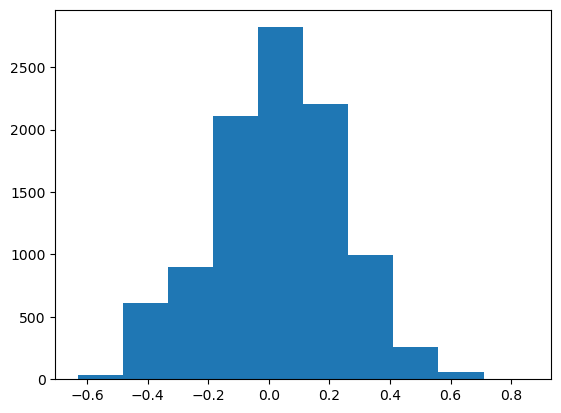

In [20]:
# unsure state
data = plot_before_tree_search(state2)

6
{'move': 'right'}


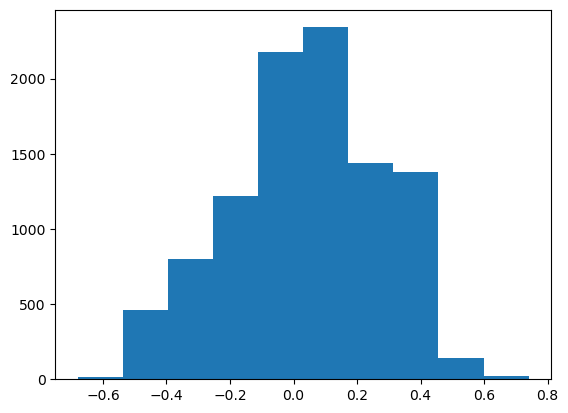

In [21]:
data = plot_after_tree_search(state2)